In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Load And Preprocess of Data

In [ ]:
dataset = open("book.txt")
data_string=""
for line in dataset:
  #print(line)
  #print(type(line))
  data_string = data_string + line
data_string=data_string.replace("\ufeff"," ").replace("\n"," ").replace("\r"," ").replace('“'," ").replace('”', " ").replace("\\'"," ")
#removing unnecessary space from data
data_string = data_string.split()
data_string = ' '.join(data_string)
data_string

"The Project Gutenberg eBook of The atom and the Bohr theory of its structure, by H. A. Kramers This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: The atom and the Bohr theory of its structure Authors: H. A. Kramers Helge Holst Release Date: May 5, 2023 [eBook #70708] Language: English Produced by: deaurider and the Online Distributed Proofreading Team at https://www.pgdp.net (This file was produced from images generously made available by The Internet Archive) *** START OF THE PROJECT GUTENBERG EBOOK THE ATOM AND THE BOHR THEORY OF ITS STRUCTURE *** Transcriber’s Notes: Underscores _ before an

Applying Tokenization on a data

In [ ]:
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(data_string)
#saving the tokenizer
# for tokens in tokenizer:
#   print(tokens)
pickle.dump(tokenizer,open("tokens.pkl", "wb"))
sequence_data = tokenizer.texts_to_sequences([data_string])
sequence_data = sequence_data[0]
# print(sequence_data)
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index)+1
# number of unique word in my text corpus
print(vocab_size)

{'e': 1, 't': 2, 'o': 3, 'i': 4, 'a': 5, 'n': 6, 'r': 7, 's': 8, 'h': 9, 'l': 10, 'c': 11, 'd': 12, 'u': 13, 'm': 14, 'f': 15, 'p': 16, 'g': 17, 'y': 18, 'w': 19, 'b': 20, 'v': 21, 'k': 22, 'x': 23, 'q': 24, '1': 25, '0': 26, '2': 27, '3': 28, '4': 29, 'j': 30, '5': 31, '6': 32, 'z': 33, '9': 34, '·': 35, '7': 36, '8': 37, '—': 38, 'ν': 39, '’': 40, '₂': 41, '₁': 42, '×': 43, '¹': 44, 'α': 45, '™': 46, 'μ': 47, '²': 48, '₃': 49, '⁻': 50, 'ω': 51, '′': 52, '₄': 53, '₀': 54, '″': 55, 'æ': 56, '⁸': 57, '⁰': 58, 'ₙ': 59, '³': 60, '°': 61, 'λ': 62, '⁴': 63, 'β': 64, '¼': 65, '₅': 66, '⁵': 67, '₈': 68, '½': 69, "'": 70, 'ø': 71, 'ö': 72, '∞': 73, '₆': 74, '⁷': 75, '•': 76, 'ô': 77, '⇾': 78, '⁶': 79, 'ᵦ': 80, 'ᵧ': 81, '₉': 82, '⁹': 83, 'γ': 84, '˶': 85, 'ˊ': 86, '₋': 87, '₇': 88, '‖': 89, 'å': 90, 'δ': 91, 'ε': 92, 'è': 93, 'π': 94, 'ₖ': 95}
96


In [ ]:
sequences=[]
#first 3 will be intpur and last one will be output
for i in range(3,len(sequence_data)):
  cur_word = sequence_data[i-3:i+1]
  print(cur_word)
  sequences.append(cur_word)
sequences

[9, 5, 9, 5]
[5, 9, 5, 31]
[9, 5, 31, 5]
[5, 31, 5, 5]
[31, 5, 5, 25]
[5, 5, 25, 2]
[5, 25, 2, 9]
[25, 2, 9, 5]
[2, 9, 5, 5]
[9, 5, 5, 15]
[5, 5, 15, 7]
[5, 15, 7, 8]
[15, 7, 8, 5]
[7, 8, 5, 5]
[8, 5, 5, 5]
[5, 5, 5, 30]
[5, 5, 30, 30]
[5, 30, 30, 63]
[30, 30, 63, 5]
[30, 63, 5, 5]
[63, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 23]
[5, 5, 23, 5]
[5, 23, 5, 5]
[23, 5, 5, 5]
[5, 5, 5, 4]
[5, 5, 4, 5]
[5, 4, 5, 5]
[4, 5, 5, 1]
[5, 5, 1, 4]
[5, 1, 4, 25]
[1, 4, 25, 21]
[4, 25, 21, 4]
[25, 21, 4, 4]
[21, 4, 4, 20]
[4, 4, 20, 11]
[4, 20, 11, 4]
[20, 11, 4, 1]
[11, 4, 1, 20]
[4, 1, 20, 11]
[1, 20, 11, 5]
[20, 11, 5, 5]
[11, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 11]
[5, 5, 11, 20]
[5, 11, 20, 11]
[11, 20, 11, 11]
[20, 11, 11, 20]
[11, 11, 20, 11]
[11, 20, 11, 5]
[20, 11, 5, 5]
[11, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 5]
[5, 5, 5, 25]
[5, 5, 25, 5]
[5, 25, 5, 5]
[25, 5, 5, 5]
[5, 5, 5, 

[[9, 5, 9, 5],
 [5, 9, 5, 31],
 [9, 5, 31, 5],
 [5, 31, 5, 5],
 [31, 5, 5, 25],
 [5, 5, 25, 2],
 [5, 25, 2, 9],
 [25, 2, 9, 5],
 [2, 9, 5, 5],
 [9, 5, 5, 15],
 [5, 5, 15, 7],
 [5, 15, 7, 8],
 [15, 7, 8, 5],
 [7, 8, 5, 5],
 [8, 5, 5, 5],
 [5, 5, 5, 30],
 [5, 5, 30, 30],
 [5, 30, 30, 63],
 [30, 30, 63, 5],
 [30, 63, 5, 5],
 [63, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 23],
 [5, 5, 23, 5],
 [5, 23, 5, 5],
 [23, 5, 5, 5],
 [5, 5, 5, 4],
 [5, 5, 4, 5],
 [5, 4, 5, 5],
 [4, 5, 5, 1],
 [5, 5, 1, 4],
 [5, 1, 4, 25],
 [1, 4, 25, 21],
 [4, 25, 21, 4],
 [25, 21, 4, 4],
 [21, 4, 4, 20],
 [4, 4, 20, 11],
 [4, 20, 11, 4],
 [20, 11, 4, 1],
 [11, 4, 1, 20],
 [4, 1, 20, 11],
 [1, 20, 11, 5],
 [20, 11, 5, 5],
 [11, 5, 5, 5],
 [5, 5, 5, 5],
 [5, 5, 5, 11],
 [5, 5, 11, 20],
 [5, 11, 20, 11],
 [11, 20, 11, 11],
 [20, 11, 11, 20],
 [11, 11, 20, 11],
 [11, 20, 11, 5],
 [20, 11, 5, 5],
 [11, 5, 5

In [ ]:
sequences = np.array(sequences)
sequences

array([[ 9,  5,  9,  5],
       [ 5,  9,  5, 31],
       [ 9,  5, 31,  5],
       ...,
       [ 8,  5,  5, 13],
       [ 5,  5, 13,  8],
       [ 5, 13,  8,  5]])

Seperate input_text and Output

In [ ]:
input_text = []
output = []
for combination in sequences:
  input_text.append(combination[0:3])
  output.append(combination[3])
# print(input_text)
# print(output)
input_text = np.array(input_text)
output = np.array(output)
print(input_text)
print(output)
output = to_categorical(output, num_classes = vocab_size)
output[:300]

Creating a Model


In [ ]:
model  = Sequential()
# Embedding takes size of the input_text diamension, size of each word will be 15, input length
# we are using 3 word to predict the next word
model.add(Embedding(vocab_size,15,input_length=3))
#creating the LSTM layer with output as 1000 word and next LSTM layer is true
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation = 'softmax'))
model.add(Dense(1000,activation = 'softmax'))
model.add(Dense(vocab_size, activation = 'softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3, 15)             1440      
                                                                 
 lstm_6 (LSTM)               (None, 3, 1000)           4064000   
                                                                 
 lstm_7 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_11 (Dense)            (None, 96)                96096     
                                                                 
Total params: 14,167,536
Trainable params: 14,167,536


Plot the Model


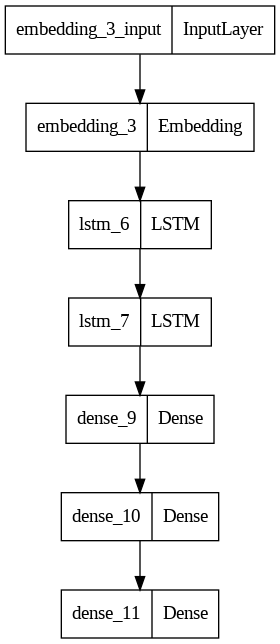

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model,show_layer_names =True)

Build the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='next_word_prediction.h5',monitor='loss',
                             save_best_only=True)
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate= 0.001))
model.fit(input_text,output,epochs=1000,batch_size=64, callbacks=[checkpoint])

Epoch 1/1000
47/47 [==============================] - 7s 56ms/step - loss: 4.5098
Epoch 2/1000
47/47 [==============================] - 1s 27ms/step - loss: 4.3987
Epoch 3/1000
47/47 [==============================] - 1s 28ms/step - loss: 4.2918
Epoch 4/1000
47/47 [==============================] - 1s 26ms/step - loss: 4.1893
Epoch 5/1000
47/47 [==============================] - 1s 24ms/step - loss: 4.0913
Epoch 6/1000
47/47 [==============================] - 1s 22ms/step - loss: 3.9969
Epoch 7/1000
47/47 [==============================] - 1s 24ms/step - loss: 3.9061
Epoch 8/1000
47/47 [==============================] - 1s 26ms/step - loss: 3.8186
Epoch 9/1000
47/47 [==============================] - 1s 22ms/step - loss: 3.7342
Epoch 10/1000
47/47 [==============================] - 1s 22ms/step - loss: 3.6518
Epoch 11/1000
47/47 [==============================] - 1s 22ms/step - loss: 3.5661
Epoch 12/1000
47/47 [==============================] - 1s 22ms/step - loss: 3.4843
Epoch 13/1000

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("next_word_prediction.h5")
tokenizer = pickle.load(open("tokens.pkl", "rb"))
def predect_next_word(model, tokenizer, text):
  #text into sequences
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequences)
  predict = np.argmax(model.predict(sequence))
  predicted_word=""
  for key,value in tokenizer.word_index.items:
    if value == predict:
      predicted_word = key
      break
  print(predicted_word)
  return predicted_word





In [ ]:

while True:
  sentence = input("Enter the text:\t")
  if sentence == "0":
    break;
  else:
    try:
      last_3_word = sentence.split(" ")
      last_3_word = last_3_word[-3:]
      print(last_3_word)
      predect_next_word(model,tokenizer,last_3_word)
    except Exception as e:
      print("Error Occured",e)